# KNN & Régression linéaire

## Introduction

Cette étude utilise un petit extrait du jeu de données de la compétition Kaggle : [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013).

**Description des données:**

- `yelp.json` est le format d'origine des données et `yelp.csv` est une verion plus accessible des mêmes données. 
- Chaque observation correspond à un avis donné par un client sur un commerce donné.
- La colonne "stars" correspond à la note donnée de 1 à 5.
- La colonne "cool" donne le nombre de votes "cool" qu'à reçu l'avis des autres utilisateurs. Tous les avis démarrent avec 0 votes "cool" et le nombre de votes est illimité. En d'autres termes ce vote correspond à la note obtenue par l'avis! et non celle du commerce.
- Les colonnes "useful" et "funny" sont similaires à la précédente.

## Mission 1

Charger `yelp.csv` dans un DataFrame et visualiser les 5 premières lignes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import warnings; warnings.simplefilter('ignore')

In [2]:
yelp = pd.read_csv("C:/Users/Dell/Desktop/knn_reglin/yelp.csv", sep=",")
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.isna()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


## Mission  1Bis

Faire la même opération mais à partir de `yelp.json` et explorer les données.

In [4]:
yelp2 = pd.read_json("C:/Users/Dell/Desktop/knn_reglin/yelp.json", lines=True)
yelp2.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'useful': 1, 'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{'funny': 0, 'useful': 2, 'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{'funny': 0, 'useful': 0, 'cool': 0}"


In [5]:
yelp2.dtypes

business_id            object
date           datetime64[ns]
review_id              object
stars                   int64
text                   object
type                   object
user_id                object
votes                  object
dtype: object

In [6]:
from pandas.io.json import json_normalize
y = json_normalize(yelp2['votes'])
y

,cool,funny,useful
0,2,0,5
1,0,0,0
2,0,0,1
3,1,0,2
4,0,0,0
5,4,1,3
6,7,4,7
7,0,0,1
8,0,0,0
9,0,0,1


In [7]:
yelp2 = pd.merge(yelp2, y, left_index = True, right_index = True)

In [8]:
yelp2.drop(['votes'], axis = 1, inplace = True)

In [9]:
yelp2.head()

,business_id,date,review_id,stars,text,type,user_id,cool,funny,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,0,2
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Mission 2

Etudier la relation entre chaque type de vote et le nombre d'étoiles.(La colonne stars sera traitée comme catégorique)<br>
Coefficients de correlation, heatmap et courbes de régressions.

In [10]:
# Coefficient de correlation

In [11]:
y2 = yelp2.corr()

In [12]:
# heatmap

In [13]:
plt.subplots(figsize=(10,6))
sns.heatmap(y2, annot = True)

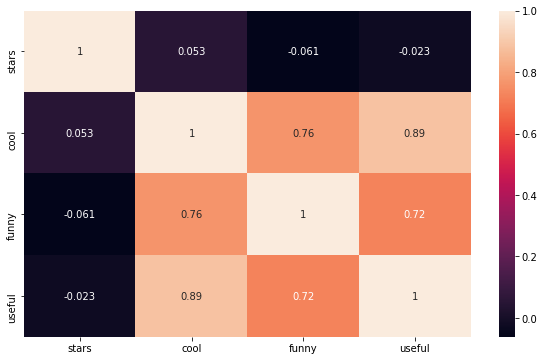

In [14]:
plt.show()

In [15]:
# nuages de points et courbes de régression

In [16]:
pairplot = sns.pairplot(yelp2, kind = 'scatter', x_vars = ['cool', 'funny', 'useful'], y_vars = ['stars'], height = 5)

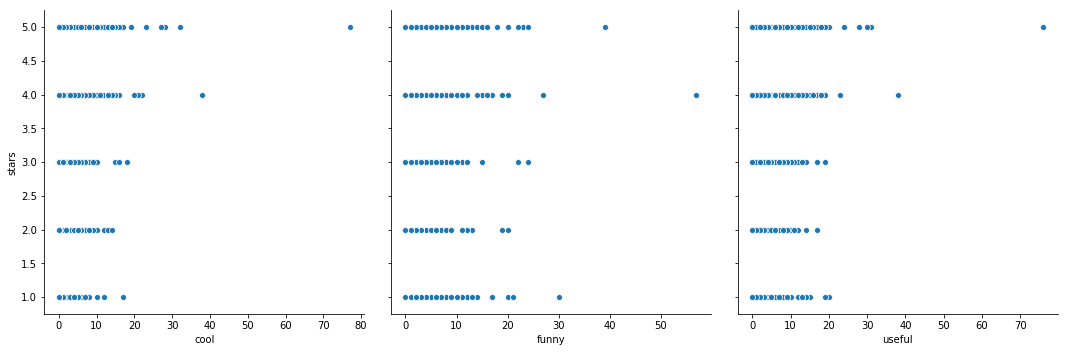

In [17]:
plt.show()

In [18]:
pairplot = sns.pairplot(yelp2, kind = 'reg', x_vars = ['cool', 'funny', 'useful'], y_vars = ['stars'], height = 5)

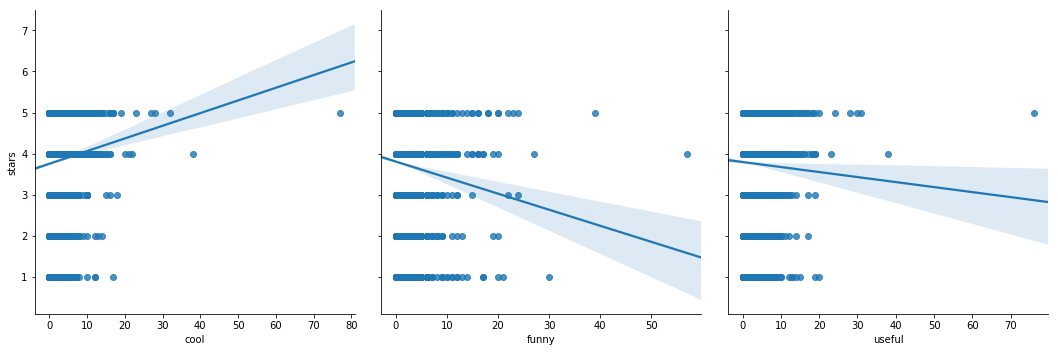

In [19]:
plt.show()

## Mission 3
Tester un algorithme de régression linéaire sur les données en considérant X = ('cool', 'useful', 'funny') et y = 'stars'.
Afficher les coefficients la courbe de régression.

In [20]:
X = yelp2[['cool', 'useful', 'funny']]
y = yelp2['stars']

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lr.coef_

array([ 0.27435947, -0.14745239, -0.13567449])

In [23]:
lr.intercept_

3.8398947927830847

In [24]:
list(zip(X, lr.coef_))

[('cool', 0.27435946858852855),
 ('useful', -0.14745239099401405),
 ('funny', -0.13567449053706357)]

In [25]:
lr.score(X,y)

0.04427285624200228

## Mission  4

Evaluer le modèle en le découpant en train/test et en calculant la RMSE

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [28]:
from sklearn import metrics

In [29]:
p = lr.predict(X)
p

array([3.65135177, 3.83989479, 3.6924424 , ..., 3.83989479, 3.83989479,
       3.83989479])

In [30]:
RMSE1 = (np.sqrt(metrics.mean_squared_error(y,p))) #RMSE
RMSE1

1.1873848193307635

## Mission 5
Réessayer en supprimant à chaque fois une des trois caractéristiques et comparer les RMSE.

In [31]:
X = yelp2[['cool', 'useful']]
y = yelp2['stars']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lr.coef_

array([ 0.20231948, -0.1710374 ])

In [33]:
lr.intercept_

3.841149281125482

In [34]:
list(zip(X, lr.coef_))

[('cool', 0.20231948451114606), ('useful', -0.17103739810179192)]

In [35]:
lr.score(X,y)

0.02582717980958671

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
p = lr.predict(X)
p

array([3.39060126, 3.84114928, 3.67011188, ..., 3.84114928, 3.84114928,
       3.84114928])

In [37]:
RMSE2 = (np.sqrt(metrics.mean_squared_error(y,p))) #RMSE
RMSE2

1.1987884115909577

In [38]:
X = yelp2[['cool']]
y = yelp2['stars']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lr.score(X,y)

0.002761980154853405

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
p = lr.predict(X)
p

array([3.81217307, 3.75043327, 3.75043327, ..., 3.75043327, 3.75043327,
       3.75043327])

In [41]:
RMSE3 = (np.sqrt(metrics.mean_squared_error(y,p))) #RMSE
RMSE3

1.2128970665880663

In [42]:
print (RMSE1 - RMSE2)

-0.011403592260194273


In [43]:
print (RMSE1 - RMSE3)

-0.025512247257302834


In [44]:
print (RMSE2 - RMSE3)

-0.01410865499710856


## Mission 6

Trouver d'autres caractéristiques (que vous pouvez créer à partir des données existentes) qui pouraient être plus pertinentes pour la prédiction du nombre d'étoiles. Recalculer alors les RMSE.<br>
Indication : traiter le texte.

In [45]:
yelp2['text'] = yelp2['text'].str.lower()

In [46]:
yelp2['text'].loc[yelp2["text"].str.contains(r'.*good.*|.*love.*|.*talents.*|.*great.*|.*sweet.*|.*delicious.*|.*happy.*|.*like.*|.*excellent.*|.*awesome.*|.*pleasant.*|.*nice.*|.*well.*|.*amazing.*|.*perfect.*|.*super.*|.*yum.*',na=False)] =1
yelp2['text'].loc[yelp2["text"].str.contains(r'.*bad.*|.*horrendously.*|.*worst.*|.*cheap.*|.*worse.*|.*expensive.*|.*supposed.*|.*terrible.*|.*inconveniant.*|.*disastrous.*|.*disappoint.*|.*disgust.*|.*horrible.*|.*poor.*',na=False)] = 0

In [47]:
yelp2[(yelp2['text'] != 1) & (yelp2['text'] != 0)]

,business_id,date,review_id,stars,text,type,user_id,cool,funny,useful
21,tdcjXyFLMKAsvRhURNOkCg,2011-06-28,LmuKVFh03Uz318VKnUWrxA,5,this place shouldn't even be reviewed - becaus...,review,YN3ZLOdg8kpnfbVcIhuEZA,1,2,1
38,-kVXDEqGHOWKxQ3EhvFgVA,2011-01-02,5V9lfjjlY7tkXgkcDUWYyg,4,"this mexican food is very simple, slightly bla...",review,Ja8SAyDdf1aY-E7vVixJiw,0,0,0
51,zp713qNhx8d9KCJJnrw1xA,2010-02-01,Bmt1QRDT0GfyXkhOvj_BfQ,5,"fred m. pretty much said what i would say, so ...",review,aqqbh1NZoFk48kp0eqSLdg,3,1,2
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,i have always been a fan of burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,another night meeting friends here. i have to...,review,MjLAe48XNfYlTeFYca5gMw,0,2,1
66,taSsiZAGZSz2gRg7_M4XDw,2011-12-30,L_q9kLaGo33j2Ij8yUIGDw,5,this an incredible church that embraces the pr...,review,0jJhjgr3wPin-8vYnPab6A,0,0,0
69,N5iW2JG5e-QyUh7brRNSfw,2012-01-05,-_hed9F2kUDdb4oa1CXKIA,5,i had looked at several invitation websites al...,review,xP3o3-r0KRUnZqBSdIGJjw,0,0,0
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,this is my first year participating in arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0
97,yGmdo1ENajB98iryHGoWFw,2011-04-12,cALYebKb5hygdKHqlQJu2Q,4,this is a very interesting place. don't go he...,review,thlVIc8s6ZCP37UGMf3yDA,0,0,0
105,COc06ScpJTN15NXMf4gkqA,2012-06-17,MbLozRSxSjtMJ3YmPCms7Q,1,see the huge sign outside that says $2.50? yea...,review,UfMHoQ4lic1aCkXFa4TxlA,0,1,2


In [48]:
yelp2 =  yelp2[(yelp2['text'] == 1 ) | (yelp2['text'] == 0)]

In [49]:
yelp2['text'] = yelp2['text'].astype('category')

In [50]:
X = yelp2[['cool', 'useful', 'funny','text']]
y = yelp2['stars']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
lr.coef_

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

predict = lr.predict(X)
predict[0]

lr.score(X, y)

RMSE4 = np.sqrt(metrics.mean_squared_error(y, predict))
RMSE4

1.1264395643879095

## Mission 7

Traietr le problème comme une classification en utilisant l'alogrithme des KNN et calculer la précision.

In [53]:
yelp2['text'] = yelp2['text'].astype('int64')

X = yelp2[['cool', 'useful', 'funny','text']]
y = yelp2['stars']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
y_pred = scaler.fit(X_train)


In [55]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 23   4   4  65  14]
 [ 13   7   8 121  24]
 [  9  12  10 207  44]
 [ 14  16  20 495 106]
 [ 11  18  20 465 105]]
              precision    recall  f1-score   support

           1       0.33      0.21      0.26       110
           2       0.12      0.04      0.06       173
           3       0.16      0.04      0.06       282
           4       0.37      0.76      0.49       651
           5       0.36      0.17      0.23       619

   micro avg       0.35      0.35      0.35      1835
   macro avg       0.27      0.24      0.22      1835
weighted avg       0.31      0.35      0.28      1835



## Mission 8

Trouver un moyen d'utiliser la regression linéaire conmme algorithme de classification et comparer sa précision à celle obtenue par KNN.

In [56]:
error = []

for i in range(1, 6):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 6), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('Number of Stars')  
plt.ylabel('Mean Error')  

Text(0, 0.5, 'Mean Error')

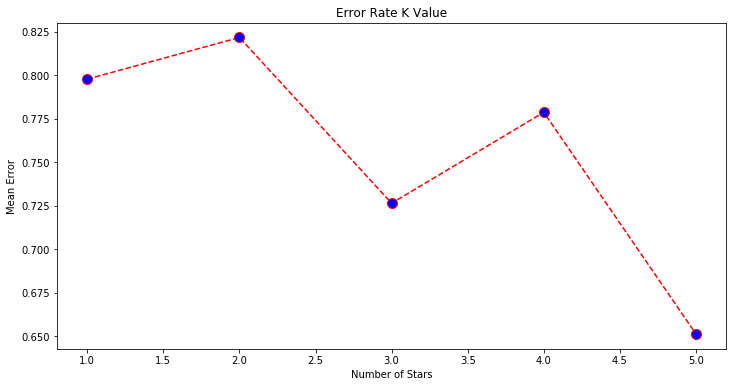

In [57]:
plt.show()